# SI 385 - Final Project Question 3
## Group 1: Dhara Patel, Felicia Chen, Priya Shah, Molly Adler

### Question: Which factors (age, BMI, glucose, etc.) are most strongly associated with length of hospital stay?

## Data Link
- https://www.kaggle.com/datasets/abdallaahmed77/healthcare-risk-factors-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

## Load Dataset

In [2]:
healthcare_data = pd.read_csv('healthcarerisk_data.csv')

## Exploratory Data Analysis (EDA)

In [3]:
healthcare_data.head()

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
0,46.0,Male,Diabetes,137.04,135.27,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,lorem,-137.057211
1,22.0,Male,Healthy,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,ipsum,-11.230610
2,50.0,NaN,Asthma,95.24,NaN,22.53,90.31,2,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82,ipsum,98.331195
3,57.0,NaN,Obesity,NaN,130.53,38.47,96.60,5,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33,lorem,44.187175
4,66.0,Female,Hypertension,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,lorem,44.831426


In [4]:
print(healthcare_data.shape)
print("Rows:", healthcare_data.shape[0])
print("Columns:", healthcare_data.shape[1])

(30000, 20)
Rows: 30000
Columns: 20


In [5]:
healthcare_data.describe(include = 'all')

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
count,25500.000000,25500,25500,25500.000000,25500.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000,30000.000000
unique,NaN,2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,Female,Hypertension,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,###,NaN
freq,NaN,12865,7120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7575,NaN
mean,54.616784,NaN,NaN,123.622179,140.455337,28.476155,94.954992,4.414133,213.033891,176.837375,6.294377,0.279767,0.238533,3.803214,4.029654,0.439433,5.917312,6.229836,NaN,-0.517010
std,15.973618,NaN,NaN,41.576943,21.077933,5.728804,3.736202,2.761536,33.519757,48.812827,1.320269,0.448892,0.426194,2.011729,1.817165,0.496326,2.225057,1.187669,NaN,100.076959
min,10.000000,NaN,NaN,20.320000,74.240000,7.670000,67.510000,1.000000,95.730000,-22.480000,3.280000,0.000000,0.000000,-3.680000,-1.750000,0.000000,-2.440000,1.590000,NaN,-412.169596
25%,45.000000,NaN,NaN,96.280000,125.140000,24.590000,93.000000,3.000000,189.500000,141.280000,5.330000,0.000000,0.000000,2.350000,2.770000,0.000000,4.370000,5.410000,NaN,-68.270749
50%,55.000000,NaN,NaN,110.500000,138.320000,28.050000,95.300000,4.000000,211.835000,173.365000,5.970000,0.000000,0.000000,3.590000,3.790000,0.000000,5.900000,6.230000,NaN,-0.510742
75%,66.000000,NaN,NaN,136.610000,153.790000,31.810000,97.380000,5.000000,235.310000,208.630000,6.920000,1.000000,0.000000,5.060000,5.020000,1.000000,7.440000,7.050000,NaN,66.811399


In [6]:
healthcare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                25500 non-null  float64
 1   Gender             25500 non-null  object 
 2   Medical Condition  25500 non-null  object 
 3   Glucose            25500 non-null  float64
 4   Blood Pressure     25500 non-null  float64
 5   BMI                30000 non-null  float64
 6   Oxygen Saturation  30000 non-null  float64
 7   LengthOfStay       30000 non-null  int64  
 8   Cholesterol        30000 non-null  float64
 9   Triglycerides      30000 non-null  float64
 10  HbA1c              30000 non-null  float64
 11  Smoking            30000 non-null  int64  
 12  Alcohol            30000 non-null  int64  
 13  Physical Activity  30000 non-null  float64
 14  Diet Score         30000 non-null  float64
 15  Family History     30000 non-null  int64  
 16  Stress Level       300

In [7]:
healthcare_data.isnull().sum()

Age                  4500
Gender               4500
Medical Condition    4500
Glucose              4500
Blood Pressure       4500
BMI                     0
Oxygen Saturation       0
LengthOfStay            0
Cholesterol             0
Triglycerides           0
HbA1c                   0
Smoking                 0
Alcohol                 0
Physical Activity       0
Diet Score              0
Family History          0
Stress Level            0
Sleep Hours             0
random_notes            0
noise_col               0
dtype: int64

## Dealing With Null Values

In [8]:
healthcare_data['Blood Pressure'] = (
    healthcare_data['Blood Pressure'].fillna(
        healthcare_data['Blood Pressure'].median()
    )
)

healthcare_data['Age'] = healthcare_data['Age'].fillna(
    healthcare_data['Age'].median()
)

healthcare_data['Glucose'] = healthcare_data['Glucose'].fillna(
    healthcare_data['Glucose'].median()
)

# TODO: maybe also handle nulls for "gender" and "medical condition"

In [9]:
# Drop irrelevant columns
healthcare_data = healthcare_data.drop(columns=['random_notes', 'noise_col'])

In [10]:
healthcare_data.isnull().sum()

Age                     0
Gender               4500
Medical Condition    4500
Glucose                 0
Blood Pressure          0
BMI                     0
Oxygen Saturation       0
LengthOfStay            0
Cholesterol             0
Triglycerides           0
HbA1c                   0
Smoking                 0
Alcohol                 0
Physical Activity       0
Diet Score              0
Family History          0
Stress Level            0
Sleep Hours             0
dtype: int64

In [11]:
healthcare_data.groupby('Family History')[['Cholesterol','Triglycerides','Blood Pressure']].agg(['mean','median','std','min','max'])

Cholesterol                                   Triglycerides  \
                      mean  median        std    min     max          mean   
Family History                                                               
0               210.790689  209.05  33.604675  95.73  355.27    173.991422   
1               215.895449  215.21  33.193061  99.59  358.37    180.467837   

                                                 Blood Pressure          \
                median        std    min     max           mean  median   
Family History                                                            
0               169.03  49.223574 -22.48  421.51     138.369752  138.32   
1               178.16  48.041538  -8.14  401.97     142.386935  138.32   

                                          
                      std    min     max  
Family History                            
0               19.545895  74.24  226.38  
1               19.087120  76.98  224.25

## Analysis Question: Which factors (age, BMI, glucose, etc.) are most strongly associated with length of hospital stay?

In [16]:
healthcare_numeric = healthcare_data.select_dtypes(include=[np.number])
healthcare_categorical = healthcare_data.select_dtypes(exclude=[np.number])

In [17]:
TARGET_COL = "LengthOfStay"

In [18]:
# Calculate the correlation matrix
correlation_matrix = healthcare_numeric.corr()

# Unstack to series, reset index, drop duplicate pairs, and rename columns
corr_df = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates().reset_index()
corr_df.columns = ['var1', 'var2', 'corr']

# Remove self-correlations (1.0)
corr_df = corr_df[corr_df['var1'] != corr_df['var2']]

# Sort by absolute correlation value in descending order
sorted_correlations = corr_df.iloc[
    abs(corr_df['corr']).argsort()[::-1]
].reset_index(drop=True)

sorted_correlations[:5]

,var1,var2,corr
0,Glucose,HbA1c,0.562167
1,Diet Score,Physical Activity,0.468068
2,BMI,Physical Activity,-0.346375
3,HbA1c,Diet Score,-0.345530
4,Diet Score,BMI,-0.296641


In [24]:
corr_with_los = correlation_matrix[TARGET_COL]
corr_with_los = corr_with_los.reindex(corr_with_los.abs().sort_values(ascending=False).index)
print("Correlations with Length of Stay:")
print(corr_with_los)

Correlations with Length of Stay:
LengthOfStay         1.000000
Stress Level         0.264238
Sleep Hours         -0.253759
Diet Score          -0.241152
HbA1c                0.240723
Glucose              0.209352
Physical Activity   -0.183073
Oxygen Saturation   -0.145913
Age                  0.101629
Cholesterol          0.100028
Smoking              0.094633
Triglycerides        0.080654
Family History       0.051304
Blood Pressure       0.034295
Alcohol              0.031196
BMI                  0.001351
Name: LengthOfStay, dtype: float64


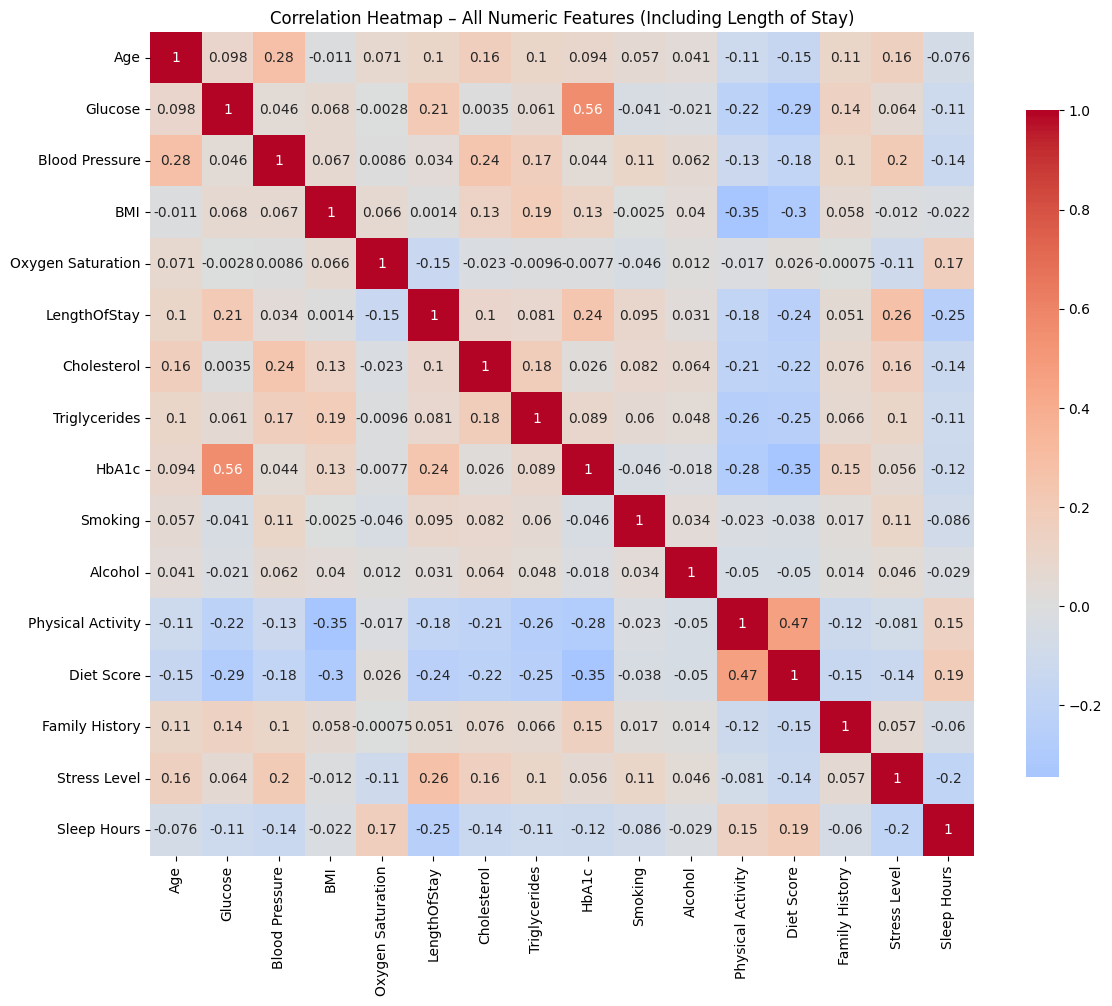

In [23]:
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    center=0,
    annot=True,
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap – All Numeric Features (Including Length of Stay)")
plt.tight_layout()
plt.show()

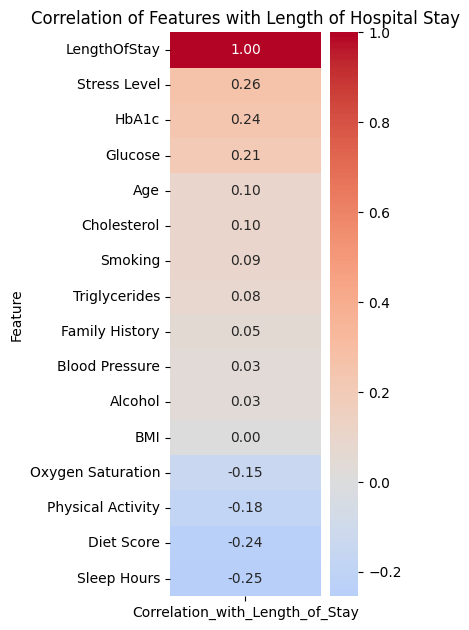

In [21]:
corr_target_df = corr_with_los.to_frame(name="Correlation_with_Length_of_Stay")

plt.figure(figsize=(4, max(6, len(corr_target_df) * 0.4)))
sns.heatmap(
    corr_target_df,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    cbar=True
)
plt.title("Correlation of Features with Length of Hospital Stay")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# END OF NOTEBOOK